# OOI Cruise Data Comparison
*Revised by Sage Lichtenwalner, Rutgers University, June 6, 2018*

In this example, we will compare the CTD data from the Pioneer Upstream Offshore Profiler Mooring and that taken from a shipboard cast durig a cruise.

In general, most OOI deployment and recovery cruises include CTD casts and water samples as part of their operational procedures (as well as some [other measurements](http://oceanobservatories.org/operations-plan/cruise-data-types/)).  Ideally, a CTD cast is taken before a mooring is removed and when the replacement mooring is deployed.  

CTD casts typically include the following variables:
* Temperature
* Salinity (conductivity)
* Pressure (depth)
* Oxygen
* Fluorescence
* Turbidity
* PAR/irradiance

Additionally, water samples are often taken at a few depths during many casts.  These are sent to various labs for processing, and include measurements on:
* Carbon: DIC, total alkalinity, pH
* Chlorophyll-a Fluorescence
* Nutrients: PO4, NO3, NO2, SIOH4, NH4
* Salinity 
* Dissolved Oxygen

All data collected during cruises is posted in the [OOI Cruise Data Archive](http://oceanobservatories.org/cruise-data/).  The archive isn't necessarily easy to navigate, but each cruise data directory includes a start date which can be used when searching for data from a specific deployment time range.  The Quick Look reports for each cruise describe when and where each CTD cast was taken, and whether water samples were also taken.  If you're looking for a cast near a specific mooring, this is a good place to check.  These reports also detail when moorings and gliders were recovered and deployed, along with any other notable events that occurred.  It may also be helpful to check out the lookup sheet created by the OOI Data Team that cross references each mooring deployment with a relevant cruise CTD cast.  (This is not yet publicly available.)

For this example, we will focus on CP02PMUO.  Because this is an offshore profiler, it has a larger depth range than some of the other coastal sites.  Plus, because it is in the Mid-Atlantic, we should see a clear 2-layer system, especially in the summer.

As it turns out, looking through the cruise reports for the Pioneer 9 cruise, we discovered that early in Leg 1 ([see report](https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/90e26d09-ca90-4998-b24c-ad724bc714ff/3204-00902_Quick_Look_Cruise_Report_Coastal_Pioneer_9_Leg_1_2017-10-25_Ver_1-00.pdf)), a CTD cast was taken near this mooring on 2017-10-24 2027 UTC.  We will use this cast for our comparison.

# Cruise CTD

I found the relevant CTD data file by navigating to the following directory in the Cruise Data archive.

OOI > Coastal Pioneer Array > Cruise Data > Pioneer-09_AR-24_2017-10-22 > Ship Data > Leg 1 (AR24a) > ctd > process

This directory includes all of the processed data files from the CTD.  The files are named according to the cruise (ar24) and cast number (011). 

Here are the available files for this cast:
* ar24011.asc - The ascii data file
* ar24011.btl - Information on the depths bottle sample were taken (if any)
* ar24011.cnv - The full dataset, basically the header combined with the ascii data file
* ar24011.hdr - The header file that describes each column in detail as well as other configuration information
* ar24011.jpg - A quickplot image
* ar24011.ros 
* AR24011.XMLCON 

These actually contain the data from both the downcast and the upcast.  For just the downcast, we could use the files beginning with "dar24", and likewise for the upcast, the files beginning with "uar24'.


In [0]:
# Downcast Only
# data_file = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/ef3f532b-7570-43d9-b016-6b58c4429b15/dar24011.asc'

# Down and Up Casts
data_file = 'https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/0ddd2680-e35d-46bc-ac1a-d350da4f409d/ar24011.asc'

First, let's load in the CTD .asc data file directly from the Cruise Data portal (aka Alfresco).  

As it turns out, two of the header names run together so we can't automatically load the file without issues. 

For now we'll skip the header by specifying header=None and skip-rows=1, and then we'll manually specify the names for the columns we need.  

You can check the .hdr file to see which column is which.  The variables, particularly Salinity, are not always in the same column throughout the Cruise Data archive.


In [0]:
# Load needed Python libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the cruise data file, without the header names
cruise_data = pd.read_table(data_file, delim_whitespace=True, header=None, skiprows=1)

# Instead let's specify the column names for just the ones we need.  
cruise_data = cruise_data.rename( columns={ 0:'Pressure', 1:'Temperature', 13:'Salinity' } )

# Let's show a snippet of what we have.
cruise_data[0:5]

,Pressure,Temperature,2,3,4,5,6,7,8,9,10,11,12,Salinity,14,15,16,17,18
0,14.109,20.0267,20.0286,4.761192,4.760965,2.3811,0.0072,0.3726,34.7215,-1197.0,120.110,-10.040,14.0,34.7221,34.7187,4.3782,1521.47,24.5434,24.5403
1,15.116,20.0913,20.0946,4.774499,4.773866,2.3844,-0.0245,0.3700,34.7693,-1209.0,114.240,-9.450,15.0,34.7772,34.7693,4.3803,1521.73,24.5684,24.5615
2,16.124,20.2141,20.2261,4.798151,4.798984,2.3890,-0.0361,0.3785,34.8535,-1207.0,103.680,-8.592,16.0,34.8684,34.8652,4.3803,1522.19,24.6055,24.5999
3,17.132,20.3139,20.3342,4.816313,4.818994,2.3877,-0.0401,0.3759,34.9214,-1198.0,92.776,-7.741,17.0,34.9335,34.9386,4.3687,1522.55,24.6287,24.6272
4,18.140,20.4459,20.4594,4.841045,4.842165,2.3798,-0.0509,0.3744,35.0078,-1181.0,87.171,-7.383,18.0,35.0250,35.0229,4.3388,1523.03,24.6633,24.6581


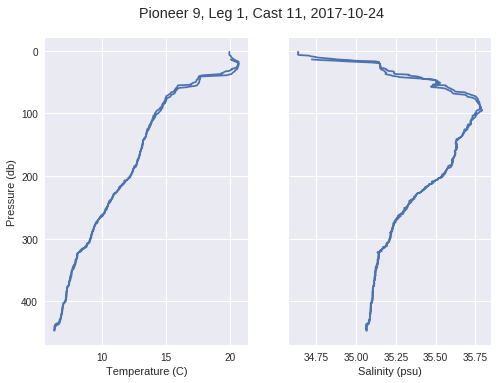

In [4]:
# Time to make some plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(cruise_data.Temperature,cruise_data.Pressure,'-')

ax1.invert_yaxis() # Flip the y-axis so deeper waters are on the bottom
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (db)')

ax2.plot(cruise_data.Salinity,cruise_data.Pressure,'-')
ax2.set_xlabel('Salinity (psu)')

fig.suptitle('Pioneer 9, Leg 1, Cast 11, 2017-10-24')
fig.subplots_adjust(top=0.9);

And here is the quickplot of the same data from the cruise.  The temperature (in green) and salinity (in blue) appear to match what we have above. Yipee!

![Cruise Image](https://alfresco.oceanobservatories.org/alfresco/d/d/workspace/SpacesStore/77219b33-3e84-441c-8c44-9a702773874b/dar24011.jpg =650x)

# Pioneer Upstream Offshore Profiler

Now, let's grab some data from the profiler from the same day as the CTD cast, October 24, 2017.

In [0]:
# First, we need to add some more Python libraries
import requests
import datetime

Next, let's specify some variables we need to request the data via the API

In [0]:
# API Information
USERNAME = ''
TOKEN = ''
API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [0]:
# Instrument Information
site = 'CP02PMUO'
node = 'WFP01'
instrument = '03-CTDPFK000'
method = 'telemetered'
stream = 'ctdpf_ckl_wfp_instrument'

data_request_url ='/'.join((API_BASE_URL,site,node,instrument,method,stream))

params = {
  'beginDT':'2017-10-24T00:00:00.000Z',
  'endDT':'2017-10-25T00:00:00.000Z',
  'limit':1000,   
}

Note, that we used beginDT and endDT in the params array to limit the request to just one day.  

We also specified "limit" to restrict the returned dataset to approximately 1,000 data points.  We could set this as high as 20,000, but for anything beyond that, we would need to request data asynchronously (i.e. we would need to download a netcdf file).

Now, let's grab the data and process the result (which is returned as a JSON array) into something we can use.

In [0]:
# Grab the data
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

In [0]:
# Time Processing Routines 
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)


In [0]:
# Process the data
p_time = []
p_temp = []
p_sal = []
p_pr = []
for i in range(len(data)):
  p_time.append(ntp_seconds_to_datetime(data[i]['time']))
  p_temp.append(data[i]['ctdpf_ckl_seawater_temperature'])
  p_sal.append(data[i]['practical_salinity'])
  p_pr.append(data[i]['ctdpf_ckl_seawater_pressure'])


### Time for some more plots!

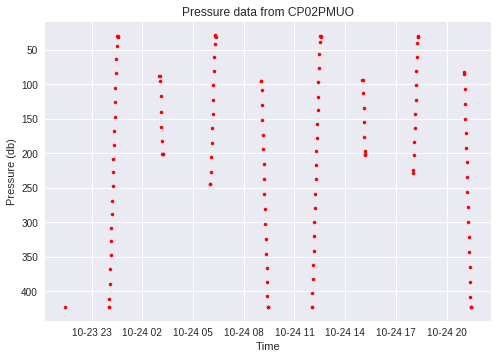

In [11]:
# First, let's make a timeseries of pressure
plt.plot_date(p_time,p_pr,'r.')
plt.gca().invert_yaxis()
plt.xlabel('Time')
plt.ylabel('Pressure (db)')
plt.title('Pressure data from CP02PMUO');

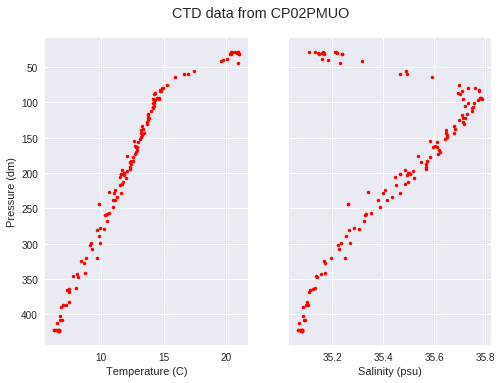

In [12]:
# Next, let's create some profile plots of Temperature and Salinity
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(p_temp,p_pr,'r.')
ax1.invert_yaxis()
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (dm)')

ax2.plot(p_sal,p_pr,'r.')
ax2.set_xlabel('Salinity (psu)')

fig.suptitle('CTD data from CP02PMUO')
fig.subplots_adjust(top=0.9);

# Comparing the Two

Now let's plot the Cruise CTD Cast and the Profiler CTD data together.

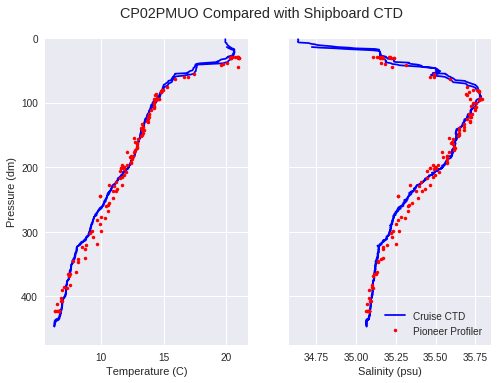

In [13]:
# One plot to rule them all
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.plot(cruise_data.Temperature,cruise_data.Pressure,'b')
ax1.plot(p_temp,p_pr,'r.')
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (dm)')
# ax1.invert_yaxis()
ax1.set_ylim(475,0)

ax2.plot(cruise_data.Salinity,cruise_data.Pressure,'b',label='Cruise CTD')
ax2.plot(p_sal,p_pr,'r.',label='Pioneer Profiler')
ax2.set_xlabel('Salinity (psu)')

fig.suptitle('CP02PMUO Compared with Shipboard CTD')
fig.subplots_adjust(top=0.9)

legend = ax2.legend(loc='lower right', shadow=True, fontsize='small')


In general, the two match rather well.  Surprisingly, the down and up casts from the Cruise CTD cast match really well (often this isn't the case).  The profiler has quite a bit more variability around the cast, but the aligns pretty well with the shipboard cast.  

Of course, the profiler currently includes data from the entire day.  To see if some of the variability might be accounted for by this, we could plot just the profile taken closest to the ship cast time.

-By Sage Lichtenwalner, 4/24/18